In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
import tensorflow as tf
import pydot
from IPython.display import Image
from IPython.display import SVG
import timeit
from sklearn.model_selection import train_test_split

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

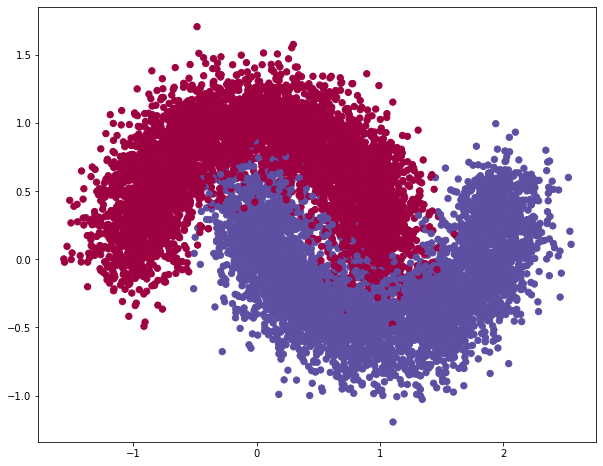

In [ ]:
np.random.seed(0)
train_X, train_y = sklearn.datasets.make_moons(10000, noise=0.20)

x_train, x_val, y_train, y_val = train_test_split(train_X, train_y, train_size=0.9)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=train_y, cmap=plt.cm.Spectral)

In [ ]:
y_train_new = []
y_val_new = []
for num, i in enumerate(y_train):
    if i==0:
        y_train_new.append([1,0])
    else:
        y_train_new.append([0,1])
        
for num, i in enumerate(y_val):
    if i==0:
        y_val_new.append([1,0])
    else:
        y_val_new.append([0,1])

In [ ]:
## Initialize neural network architecture

In [ ]:
#num_examples = len(X)
nn_input_dim = train_X.shape[1]
nn_output_dim = 2
nn_hdim = 100

epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01

# Define variables
def initialize_variables():
    x = tf.placeholder(tf.float32, shape=[None, nn_input_dim])
    y = tf.placeholder(tf.float32, shape=[None, nn_output_dim])

    return x, y

#Define weights and biases
def initialize_weights_biases():
    np.random.seed(0)
    W1 = tf.Variable(tf.random_normal(shape=[nn_input_dim, nn_hdim]))
    b1 = tf.Variable(tf.zeros(shape=[1, nn_hdim]))
    W2 = tf.Variable(tf.random_normal(shape=[nn_hdim, nn_output_dim]))
    b2 = tf.Variable(tf.zeros(shape=[1, nn_output_dim]))
    
    return W1, b1, W2, b2

In [ ]:
def neural_network_model(train_X, train_y, num_rounds=10000):
    
    X, y = initialize_variables()
    W1, b1, W2, b2 = initialize_weights_biases()
    
    #Forward Propogation
    z1 = tf.matmul(X, W1) + b1
    a1 = tf.nn.sigmoid(z1)
    yhat = tf.matmul(a1, W2) + b2
    predict = tf.argmax(yhat, axis=1)
    
    #Back-Propogation
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
    
    #Intialize Session
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(num_rounds):
        sess.run(updates, feed_dict={X:x_train, y:y_train_new})

        train_accuracy = np.mean(np.argmax(y_train_new, axis=1) ==
                             sess.run(predict, feed_dict={X: x_train, y: y_train_new}))
        
        
        test_accuracy = np.mean(np.argmax(y_val_new, axis=1) ==
                             sess.run(predict, feed_dict={X: x_val, y: y_val_new}))
        
        
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
                  % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
    
    sess.close()
  

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
neural_network_model(train_X, train_y)

Streaming output truncated to the last 5000 lines.
Epoch = 5002, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5003, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5004, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5005, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5006, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5007, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5008, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5009, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5010, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5011, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5012, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5013, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5014, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5015, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5016, train accuracy = 88.28%, test accuracy = 89.30%
Epoch = 5017, train